# 01 correlations
This notebook will be used to analyze correlations between different datasets.

## imports

In [1]:
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## data
Below we'll grab stock data for EA Games and Activision Blizzard.

5y
5y


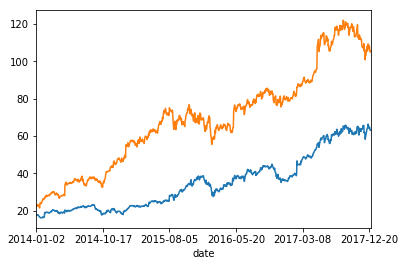

In [8]:
start_date = "2014-01-01"
end_date = "2017-12-31"
data_source = "iex"

atvi = web.DataReader("ATVI", data_source=data_source, start=start_date, end=end_date)
ea = web.DataReader("EA", data_source=data_source, start=start_date, end=end_date)

atvi["close"].plot()
ea["close"].plot()

Before we move on, let's not forget to convert the indices to datetimes.

In [17]:
atvi.index = pd.to_datetime(atvi.index)
ea.index = pd.to_datetime(ea.index)

## correlation of EA and ATVI
Perhaps there is a correlation between the returns on EA and ATVI. In order to see this, we'll first need to compute the percent change for each dataset. Below we'll work with closing prices.

In [18]:
close = pd.concat([atvi["close"], ea["close"]], axis=1)
close.columns = ["atvi", "ea"]
close.head()

,atvi,ea
date,,
2014-01-02,17.5441,22.83
2014-01-03,17.7577,22.68
2014-01-06,17.5538,22.53
2014-01-07,17.7820,23.10
2014-01-08,17.8063,23.31


### percent change

In [19]:
returns = close.pct_change()
returns.head()

,atvi,ea
date,,
2014-01-02,NaN,NaN
2014-01-03,0.012175,-0.006570
2014-01-06,-0.011482,-0.006614
2014-01-07,0.013000,0.025300
2014-01-08,0.001367,0.009091


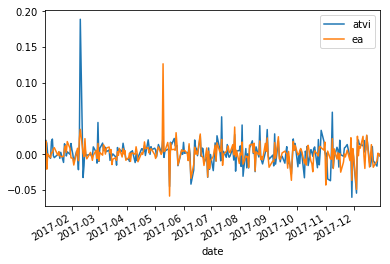

In [24]:
returns["2017"].plot()

Even looking at a concentrated 1 year period, it's hard to tell with the above graph whether or not there's a correlation between the movement of the two stocks. We'll investigate further.

### computing correlations

In [30]:
print("Correlation: {}".format(returns["atvi"].corr(returns["ea"])))

Correlation: 0.5068343411425836


So, there seems to be some correlation, but with respect to the possible interval [-1, 1], it seems as though the returns are only moderately positively correlated.

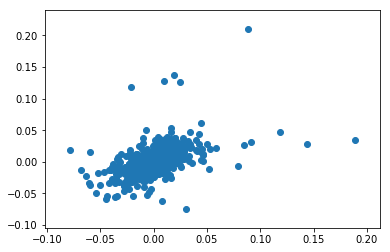

In [31]:
plt.scatter(returns["atvi"], returns["ea"])

## the important difference between correlation of returns vs. correlation of levels
Two different datasets may show a strong correlation even if they are completely unrelated. This is known as *spurious correlation*. By observing the correlation in levels, analysts may see a high correlation, but when observing percent changes, there should be a much weaker correlation.

5y
5y


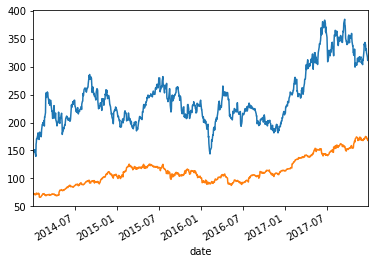

In [34]:
tsla = web.DataReader("TSLA", data_source=data_source, start=start_date, end=end_date)
aapl = web.DataReader("AAPL", data_source=data_source, start=start_date, end=end_date)
tsla.index = pd.to_datetime(tsla.index)
aapl.index = pd.to_datetime(aapl.index)
tsla["close"].plot()
aapl["close"].plot()

In [35]:
print("Levels corr: {}".format(tsla["close"].corr(aapl["close"])))

Levels corr: 0.781572100690799


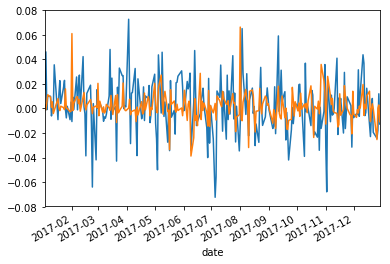

In [36]:
tsla_returns = tsla.pct_change()
aapl_returns = aapl.pct_change()
tsla_returns["2017"]["close"].plot()
aapl_returns["2017"]["close"].plot()

In [37]:
print("Returns corr: {}".format(tsla_returns["close"].corr(aapl_returns["close"])))

Returns corr: 0.2535844526558534
